# numpy를 사용해 봅시다

numpy는 수학적 연산를 가능하게 해 주는 파이썬 라이브러리 중 하나입니다.
예를 들어 하나의 배열을 생성하고 프린트해 봅시다.

In [1]:
import numpy as np

x = np.array([1, 2, 3])
print(x)

[1 2 3]


numpy에는 exp, sin, cos과 같은 기본 함수가 내장되어 있습니다. 이러한 함수의 그래프를 그리기 위해서는 **matplotlib** 이라는 라이브러리를 불러와야 합니다. 예를 들어 함수 $y=sin(x)$의 그래프를 $x\in[-2\pi,2\pi]$에서 그려봅시다.

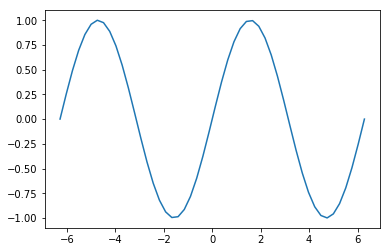

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2*np.pi,2*np.pi)
y = np.sin(x)
plt.plot(x,y)
plt.show()

이번에는 함수 $y=e^x$의 그래프를 $x\in[0,10]$에서 그려봅시다. (_참고로 위에서 이미 matplotlib과 numpy를 불러왔으므로 아래 코드에서 이 라이브러리를 다시 불러올 필요는 없습니다. 아래에 두 라이브러리를 다시 불러오는 이유는 아래 코드만 따로 실행하였을 때 오류가 나지 않도록 하기 위함입니다._)

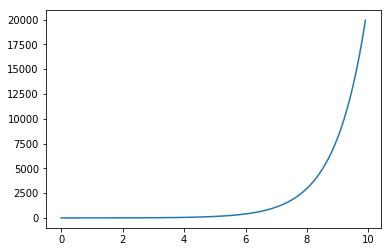

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,10,.1) # arange(INIT,END,INTV)는 INIT에서 END까지 INTV간격의 배열을 생성합니다.
y = np.exp(x)
plt.plot(x,y)
plt.show()

**앞으로는 _numpy_은 ```np```로, _matplotlib.pyplot_은 ```plt```로 이미 불러왔다(import)고 가정하겠습니다.**

그래프에는 여러가지 속성을 부여할 수 있습니다.

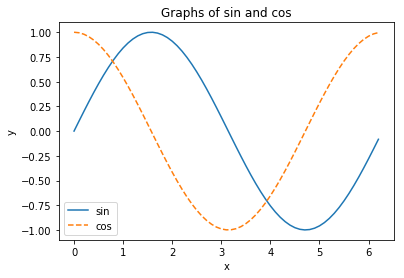

In [8]:
x = np.arange(0,2*np.pi,.1)
y1 = np.sin(x) 
y2 = np.cos(x)

plt.plot(x,y1,label="sin")
plt.plot(x,y2,linestyle="--",label="cos")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Graphs of sin and cos")
plt.legend()
plt.show()

_matplotlib.pyplot_에는 이미지를 불러올 수 있는 imread 함수가 내장되어 있습니다. 이미지를 읽는 ```imread``` 명령어는 _matplotlib.image_에 있습니다.

(267, 400, 3)


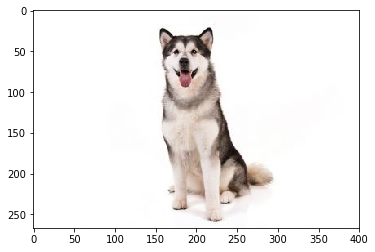

In [4]:
from matplotlib.image import imread

img = imread('./pic/dog.jpg')

print(img.shape) # ARRY.shape는 배열 ARRY의 크기를 반환합니다.
plt.imshow(img)
plt.show()

# 퍼셉트론을 만들어 봅시다
퍼셉트론(perceptron)이란 두 개의 신호값 $x_1,x_2$에 가중치 $w_1,w_2$를 각각 곱하여 얻은 두 수의 합이 한계치(threshold) $\theta$보다 작으면 $0$, 크면 $1$을 반환하는 구조를 말합니다. $1$이 반환될때, 결과 뉴런이 활성화(activation)되었다라고 합니다. 다시 말해, 결과 뉴런의 값을 $y$라 하면
    $$y = \left\{\begin{array}{cl}
    0 & x_1w_1+x_2w_2 \le \theta \\ 
    1 & x_1w_1+x_2w_2 > \theta \end{array}\right.$$
이 됩니다. 예를 들어 $w_1=w_2=0.5$이고 $\theta=0.7$이면, $x_1=x_2=1$일 때 $0.5+0.5 = 1 > 0.7$ 이므로 뉴런의 값은 $y=1$이 됩니다.

In [106]:
def Perceptron(x1,x2):
    w1,w2,theta = .5,.5,.7
    tmp = x1*w1+x2*w2
    if tmp <= theta:
        return 0
    else:
        return 1
    
print(Perceptron(1,1))

1


이를 그림으로 표현하면 다음과 같습니다.

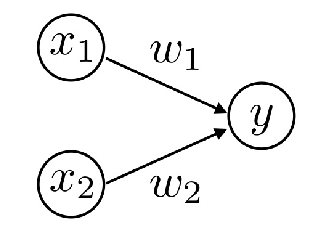

In [107]:
img = imread('./pic/pic_perceptron.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

## 퍼셉트론을 이용하여 논리회로를 만들어 봅시다.

가장 간단한 논리 회로를 만들어 봅시다. 

논리 회로는 크게 네 종류가 있습니다.

* AND 게이트 
```y = AND(x1,x2)```

| $x_1$ | $x_2$ |  $y$  |
|:-----:|:-----:|:-----:|
|   0   |   0   |   0   |
|   1   |   0   |   0   |
|   0   |   1   |   0   |
|   1   |   1   |   1   |

* NAND 게이트
```y = NAND(x1,x2)```

| $x_1$ | $x_2$ |  $y$  |
|:-----:|:-----:|:-----:|
|   0   |   0   |   1   |
|   1   |   0   |   1   |
|   0   |   1   |   1   |
|   1   |   1   |   0   |

* OR 게이트
```y = OR(x1,x2)```

| $x_1$ | $x_2$ |  $y$  |
|:-----:|:-----:|:-----:|
|   0   |   0   |   0   |
|   1   |   0   |   1   |
|   0   |   1   |   1   |
|   1   |   1   |   1   |

* XOR 게이트
```y = XOR(x1,x2)```

| $x_1$ | $x_2$ |  $y$  |
|:-----:|:-----:|:-----:|
|   0   |   0   |   0   |
|   1   |   0   |   1   |
|   0   |   1   |   1   |
|   1   |   1   |   0   |

편향(bias)을 도입한 퍼셉트론으로 AND 게이트를 만들어 봅시다. 

가중치를 $w_1=w_2=0.5$, 편향을 $b=-0.7$이라 하면 뉴런값 $y$는 다음과 같습니다.

$$y = \left\{\begin{array}{cl}
    0 & x_1w_1 + x_2w_2 + b \le 0 \\
    1 & x_1w_1 + x_2w_2 + b > 0
    \end{array}\right.$$
    
예를 들어 $x_1=x_2=1$일 때 $0.5 + 0.5 - 0.7= 0.3 > 0$이므로 뉴런의 값은 $y=1$이 됩니다.

In [108]:
def AND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([.5,.5])
    b= -.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
print(AND(1,1))

1


실제 AND 게이트를 구성하는 가중치과 편향의 값은 무한히 많습니다. 

이를 기하학적으로 생각하면 이렇습니다.

이차원 좌표평면을 직선 $0.5x_1+0.5x_2=0.7$로 구분된 두 영역으로 나눕니다.

점 $(x_1,x_2)$이 아래쪽(아래 그림의 빨간색 점)에 있으면 $0$, 위쪽(아래 그림의 파란색 점)에 있으면 $1$을 할당합니다.

아래는 이를 그림으로 표현한 것입니다. 

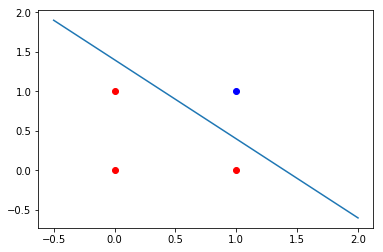

In [109]:
x = np.linspace(-.5,2)
y = 2*(0.7-.5*x)
plt.plot(x,y)
plt.plot(1,1,'bo')
plt.plot(0,1,'ro')
plt.plot(1,0,'ro')
plt.plot(0,0,'ro')
plt.show()

참고론 편향이 도입된 퍼셉트론은 다음과 같이 도시할 수 있습니다.

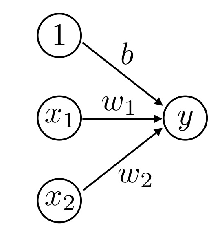

In [110]:
img = imread('./pic/pic_perceptron_with_bias.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

NAND 게이트는 AND 게이트의 반대입니다. (Not AND로 생각하시면 됩니다.) 

AND 게이트의 가중치와 편향의 부호가 모두 반대가 되었다고 생각하시면 됩니다.

In [111]:
def NAND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([-.5,-.5])
    b= .7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
print(NAND(1,1))

0


OR 게이트도 비슷하게 만들 수 있습니다.

In [112]:
def OR(x1,x2):
    x = np.array([x1,x2])
    w = np.array([1,1])
    b= -.5
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
print(OR(1,1))

1


XOR 게이트의 경우 단순 퍼셉트론으로 구성하기는 어렵습니다. 

왜냐하면 영역을 구분하기 위해 선형 방정식이 아닌 비선형 방정식이 필요하기 때문입니다. 

예를 들어 XOR값이 $1$인 점 $(1,0)$, $(0,1)$을 구분하기 위해서는 아래와 같은 곡선이 필요합니다.

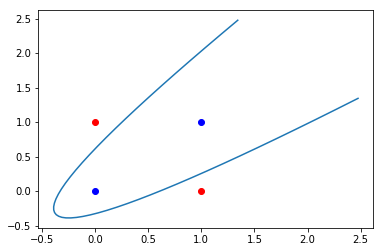

In [132]:
t = np.linspace(-.8,.8)
xy = np.array([t,5*t**2-1/2]) # 곡선 y = 5x^2-1/2 상의 점의 좌표로 이루어진 이차원 배열을 생성합니다.
theta = -np.pi/4 
rotM = np.array([[np.cos(theta),-np.sin(theta)],
                 [np.sin(theta),np.cos(theta)]]) # 평면상의 점을 시계방향으로 pi/4만큼 회전하는 행렬입니다.
[x,y] = np.dot(rotM,xy) # 포물선을 회전시킵니다.

plt.plot(x,y)
plt.plot(1,1,'bo')
plt.plot(0,1,'ro')
plt.plot(1,0,'ro')
plt.plot(0,0,'bo')
plt.show()

신기하게도 XOR은 아래와 같은 다층 구조의 퍼셉트론를 이용해서 구현할 수 있습니다.

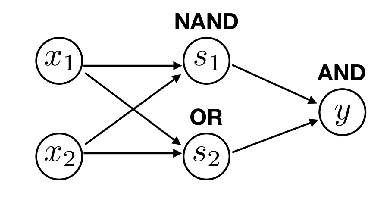

In [114]:
img = imread('./pic/pic_xor.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

이를 아래와 같이 표로 나타내면 XOR 구조와 동일함을 알 수 있습니다.

| $x_1$ | $x_2$ | $s_1$ | $s_2$ |  $y$  |
|:-----:|:-----:|:-----:|:-----:|:-----:|
|   0   |   0   |   1   |   0   |   0   |
|   1   |   0   |   1   |   1   |   1   |
|   0   |   1   |   1   |   1   |   1   |
|   1   |   1   |   0   |   1   |   0   |

아래는 이를 코드로 구현한 것입니다. 

(_아래 코드를 실행하기 전에 위에서 작성한 AND, NAND,OR을 먼저 저장해야 합니다._)

In [68]:
def XOR(x1,x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

print(XOR(1,1))

0


# 신경망 모형에 사용되는 여러가지 함수를 구현해 봅시다.

## 계단함수

계단함수(Step function)은 단순히 입력값 $x$가 0보다 작거나 같으면 $0$을, $0$보다 크면 $1$을 반환하는 함수입니다.

$$y = \left\{\begin{array}{cl} 0 & x\le 0 \\
    1 & x>0 \end{array}\right.$$

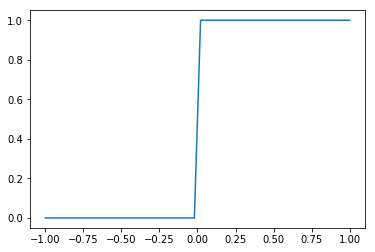

In [115]:
def step(x):
    return np.array(x>0, dtype=np.int)

x = np.linspace(-1,1)
y = step(x)
plt.plot(x,y)
plt.show()

## 시그모이드(Sigmoid) 함수

이번에는 시그모이드 함수를 구현해 봅시다. 

시그모이드 함수는 임의의 실수값 $x\in(-\infty,\infty)$을 크기 순서에 따라 $(0,1)$사이의 실수값 $y$에 대응하는 함수입니다.

$$y = \frac{1}{1+e^{-x}}$$

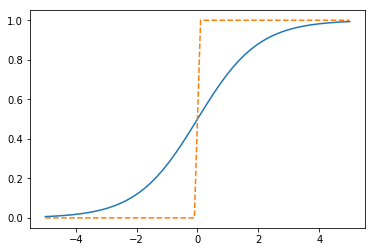

In [116]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.linspace(-5,5)
y = sigmoid(x)
plt.plot(x,y) # 시그모이드 함수 그래프
x = np.linspace(-5,5)
y = step(x)
plt.plot(x,y,'--') # 계단함수와의 비교
plt.show()

## ReLU (Rectified Linear Unit) 함수

ReLU 함수는 $x$가 $0$보다 작거나 같으면 $0$을, $0$보다 크면 $x$를 반환합니다.
$$y = \left\{\begin{array}{cl} 0 & x\le0 \\
x & x>0 \end{array}\right.$$

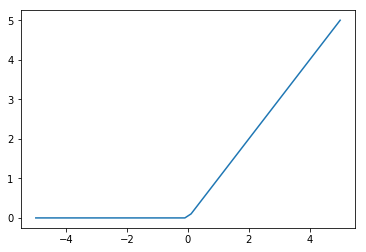

In [105]:
def ReLU(x):
    return np.maximum(0,x)

x = np.linspace(-5,5)
y = ReLU(x)
plt.plot(x,y)
plt.show()

# 다차원 배열의 연산

## 다차원 배열의 속성 보기

다차원 배열이란 2차원 이상의 행렬 구조로 나열된 배열을 의미합니다. 

더 정확히는 행렬(matrix)은 2차원 배열이고, 3차원 이상의 배열은 행렬이 아닌 텐서(tensor)라고 합니다. 

2차원 배열 ```A[i][j]```는 행렬의 $i$번째 행, $j$번째 열의 원소를 가리킵니다.

기하학적으로 이를 점 $(i,j)$에 대응된 원소라고 볼 수도 있습니다.

이를 확장시켜 ```A```가 세 개의 인덱스 $i$, $j$, $k$를 가진 3차원 배열이라 합시다. 

삼차원 공간상에 음이 아닌 정수를 좌표값으로 갖는 점들을 생각해 봅시다. 

이 때 ```A[i][j][k]```는 점 $(i,j,k)$에 할당된 원소를 가리킵니다.

아래는 다차원 배열의 속성을 파악하기 위해 사용되는 함수입니다.

In [131]:
A = np.array([[1,2,3],[4,5,6]])
print("The dimension of the array A is",np.ndim(A)) # 배열 A의 차원을 반환합니다.
print("The size of the array A is",np.size(A)) # 배열 A의 원소의 갯수를 반환합니다.
print("The shape of the array A is",np.shape(A)) # 배열 A의 모양을 반환합니다.

B = np.array([[[1,2],[3,4]],
             [[1,1],[1,3]]])
np.shape(B)

The dimension of the array A is 2
The size of the array A is 6
The shape of the array A is (2, 3)


(2, 2, 2)

두 행렬의 곱 연산은 _numpy_의 ```dot```을 사용합니다. (위에서 한번 사용한 적이 있습니다 ^^)

In [133]:
A = np.array([[1,2],[3,4]])
B = np.array([[1,2,3],[4,5,6]])
print(np.dot(A,B))

[[ 9 12 15]
 [19 26 33]]


같은 모양의 두 행렬을 항별로 연산하기 위해서 일반 산술 연산 기호를 이용합니다.

In [135]:
b = np.array([[1,1],[2,2]])
print(A*b)

[[1 2]
 [6 8]]


만약 행렬의 모양이 다를 경우, 산술 연산은 행렬의 크기에 맞추어 연산을 시도합니다. 

예를 들어 ```A,B```가 각각

$$A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix},B = \begin{bmatrix} 1 & 2 \end{bmatrix}$$

이면, ```A*B```는 다음과 같습니다. (행렬 ```B```를 $1\times 2$로 복제하여 항별 곱을 시도.)

$$\begin{bmatrix} 1\cdot1 & 2\cdot2 \\ 3\cdot1 & 4\cdot2 \end{bmatrix}$$

In [137]:
A = np.array([[1,2],[3,4]])
B = np.array([1,2])
print(A*B)

[[1 4]
 [3 8]]
